In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from google.colab import drive

In [2]:
# Step 1: Extract the image data
drive.mount('/content/drive')

df_breast = pd.read_pickle('/content/breast_df2.dat')
df_lung = pd.read_pickle('/content/lung_df.pkl')
df_colon = pd.read_pickle('/content/colon_df.pkl')

Mounted at /content/drive


In [3]:
# Concatenate the DataFrames vertically
merged_df = pd.concat([df_breast, df_lung, df_colon], axis=0)

# Reset the index of the merged DataFrame
merged_df = merged_df.reset_index(drop=True)

merged_df

,image,label,area
0,"[[[252, 253, 253], [252, 252, 253], [252, 252,...",0,breast
1,"[[[251, 252, 252], [251, 252, 252], [252, 252,...",0,breast
2,"[[[252, 252, 252], [252, 252, 252], [252, 252,...",0,breast
3,"[[[251, 251, 252], [251, 251, 251], [251, 250,...",0,breast
4,"[[[149, 99, 158], [160, 96, 159], [120, 64, 12...",0,breast
...,...,...,...
34995,"[[[42, 5, 157], [168, 113, 206], [255, 241, 23...",1,colon
34996,"[[[203, 139, 225], [210, 142, 226], [217, 163,...",1,colon
34997,"[[[242, 82, 166], [241, 119, 162], [255, 99, 1...",1,colon
34998,"[[[246, 212, 232], [226, 173, 228], [221, 165,...",1,colon


In [4]:
# Step 2: Preprocess the image data

# Convert the image data to NumPy arrays
image_data = np.array(merged_df['image'].tolist())

# Normalize the pixel values to range between 0 and 1
image_data = (image_data / 255.0) - 0.5

# Reshape the image data to have a single color channel (assuming it's RGB)
image_data = image_data.reshape(image_data.shape[0], image_data.shape[1], image_data.shape[2], 3)


In [5]:
# Step 3: Convert the labels to categorical values

# Convert the labels to numerical values
label_mapping = {'breast': 0, 'colon': 1, 'lung': 2}
labels = merged_df['area'].map(label_mapping)

# Convert the numerical labels to one-hot encoded vectors
labels = keras.utils.to_categorical(labels, num_classes=3)


In [6]:
# Step 4: Split the data into training and testing sets

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    image_data, labels, test_size=0.2, random_state=42
)

In [7]:
# Step 5: Build the CNN model
model = keras.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(image_data.shape[1], image_data.shape[2], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [8]:
# Step 6: Compile and train the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
875/875 [==============================] - 15s 6ms/step - loss: 0.1084 - accuracy: 0.9549 - val_loss: 0.0189 - val_accuracy: 0.9931
Epoch 2/20
875/875 [==============================] - 4s 4ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0203 - val_accuracy: 0.9926
Epoch 3/20
875/875 [==============================] - 4s 5ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0044 - val_accuracy: 0.9990
Epoch 4/20
875/875 [==============================] - 4s 4ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.0030 - val_accuracy: 0.9990
Epoch 5/20
875/875 [==============================] - 4s 4ms/step - loss: 0.0053 - accuracy: 0.9979 - val_loss: 0.0105 - val_accuracy: 0.9973
Epoch 6/20
875/875 [==============================] - 4s 4ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 7/20
875/875 [==============================] - 5s 5ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0476 - val_accuracy: 0.9857
Epoch

219/219 [==============================] - 1s 3ms/step - loss: 8.3186e-05 - accuracy: 1.0000
Test loss: 8.318608888657764e-05
Test accuracy: 1.0
219/219 [==============================] - 0s 2ms/step
Confusion Matrix:
[[2012    0    0]
 [   0 1955    0]
 [   0    0 3033]]
Sensitivity/Recall: 1.0
Specificity: 1.0
Precision: 1.0
Negative Predictive Value: 1.0
F1 Score: 1.0
Matthews Correlation Coefficient: 1.0
Recall: 1.0


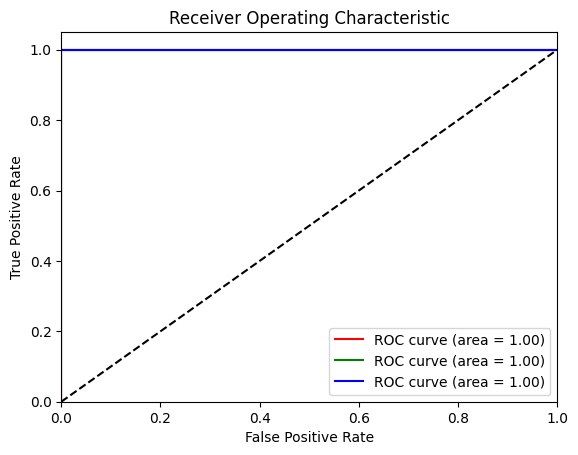

In [16]:
# Step 7: Evaluate the model

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# Calculate additional metrics
predictions = model.predict(test_images)

# Apply threshold to obtain binary predictions
threshold = 0.5
binary_predictions = np.where(predictions >= threshold, 1, 0)

# Convert test_labels to 1D array
test_labels_1d = np.argmax(test_labels, axis=1)

# Convert predictions to 1D array
binary_predictions_1d = np.argmax(binary_predictions, axis=1)

# Confusion matrix
confusion = confusion_matrix(test_labels_1d, binary_predictions_1d)
print("Confusion Matrix:")
print(confusion)

# True positive (TP), true negative (TN), false positive (FP), false negative (FN)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)
sensitivity = TP / (TP + FN)
print(f'Sensitivity/Recall: {sensitivity}')

# Specificity or True Negative Rate (TNR)
specificity = TN / (TN + FP)
print(f'Specificity: {specificity}')

# Precision or Positive Predictive Value (PPV)
precision = TP / (TP + FP)
print(f'Precision: {precision}')

# Negative Predictive Value (NPV)
npv = TN / (TN + FN)
print(f'Negative Predictive Value: {npv}')

# F1 Score (Harmonic mean of precision and recall)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f'F1 Score: {f1_score}')

# Matthews Correlation Coefficient (MCC)
mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
print(f'Matthews Correlation Coefficient: {mcc}')

# Recall
recall = sensitivity
print(f'Recall: {recall}')

# Receiver Operating Characteristic (ROC) Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming you have 3 classes
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['red', 'green', 'blue']  # Assuming you have 3 classes
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

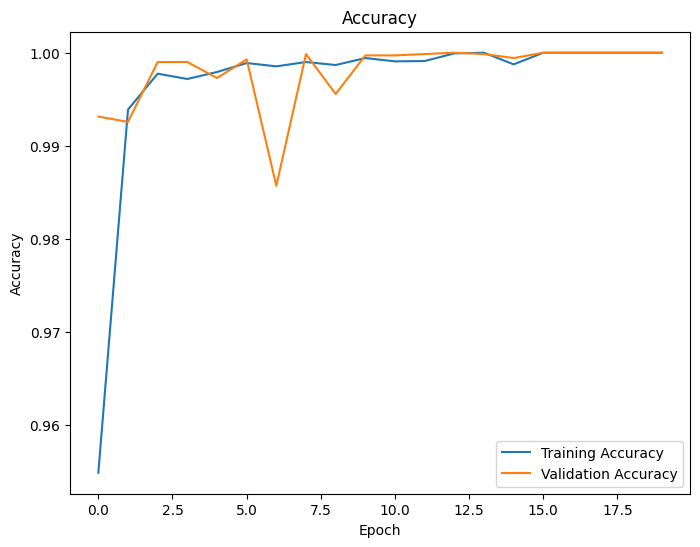

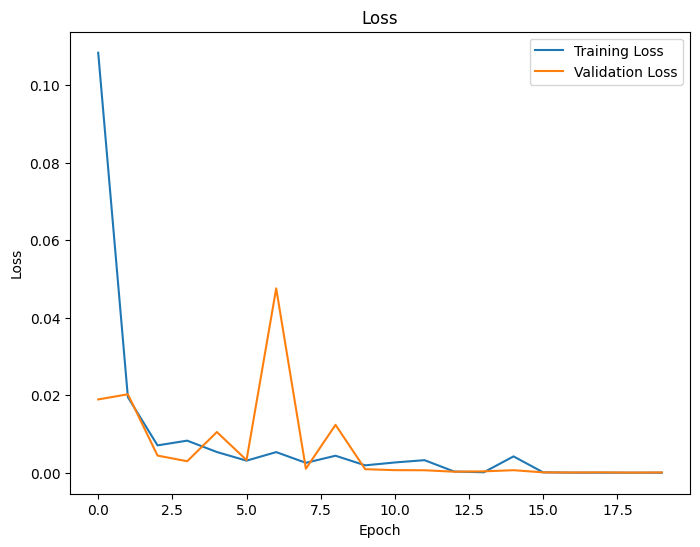

In [17]:
# Step 8: Plot accuracy and loss curves

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Guardar el modelo
model.save('./sample_data/body_part_model.h5')